In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
d = pd.read_csv('fluct_6400000.000000_0.000000_1000000_0.001000.txt')
w = d.w[0]
N = d.N[0]
dx = d.dx[0]

# Сравнение Эйлера и Хойна

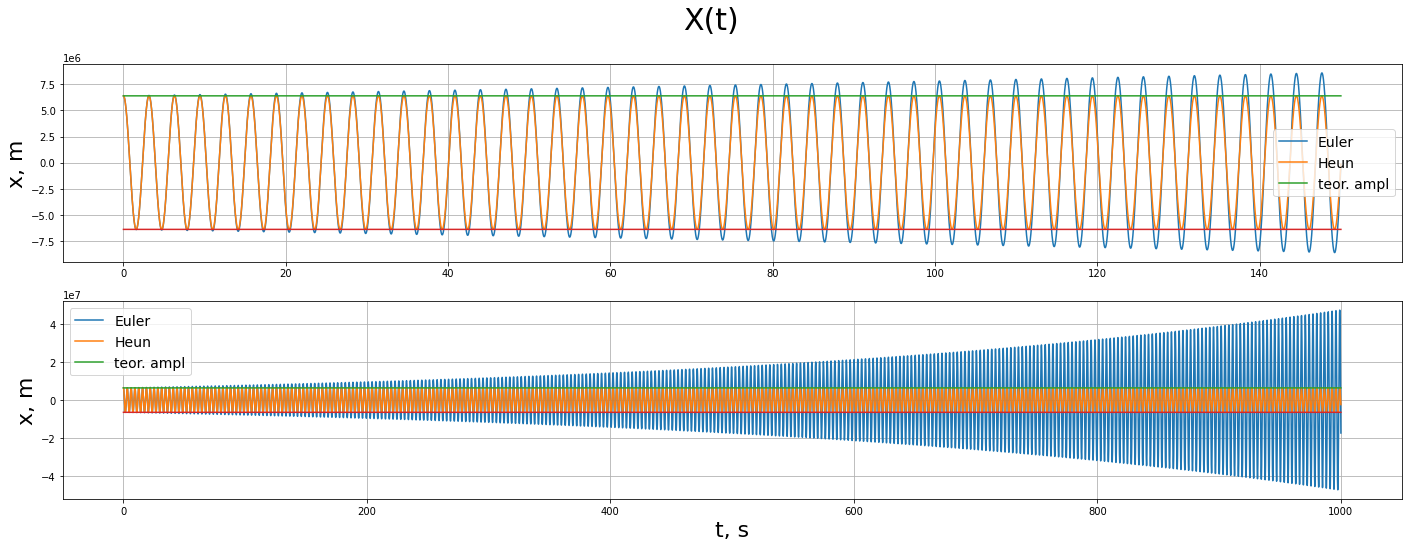

In [101]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('X(t)', fontsize=30)
fig.set_size_inches(24, 8)

t = np.linspace(0, d.N[0]*d.dx[0]*0.15, int(len(d)*0.15))
ax1.plot(t, d.x_e[:len(t)], '-', label='Euler')
ax1.plot(t, d.x_h[:len(t)], '-', label='Heun')
ax1.plot(t, t-t+6.4e6, label='teor. ampl')
ax1.plot(t, t-t-6.4e6)
ax1.set_ylabel('x, m', fontsize=22)
ax1.legend(fontsize=14, loc='best')

t = np.linspace(0, d.N[0]*d.dx[0], int(len(d)))
ax2.plot(t, d.x_e, '-', label='Euler')
ax2.plot(t, d.x_h, '-', label='Heun')
ax2.plot(t, t-t+6.4e6, label='teor. ampl')
ax2.plot(t, t-t-6.4e6)
ax2.set_ylabel('x, m', fontsize=22)
ax2.set_xlabel('t, s', fontsize=22)
ax2.legend(fontsize=14, loc='best')


ax1.grid(True)
ax2.grid(True)
plt.show()

Видно, что Хойн устойчивее (считалось на шаге 0,001).
Теоретическое предсказание нарисовал прямыми, потому что Хойн и теория становятся неотличимы.  
Проблема метода Эйлера в излишнем пренебрежении - за основу рассчета берется система
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t
\end{cases}$. 
Но это неправильно, ведь при рассчете шага координаты мы считаем, что движение равномерное, а в рассчете скорости - что движение равноускоренное. Правильнее было бы
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t + \frac{a_i}{2} (\Delta t)^2
\end{cases}$  
Хойн учитывает эту проблему усредняя по $i$ и $i+1$ шагу.

# Энергия

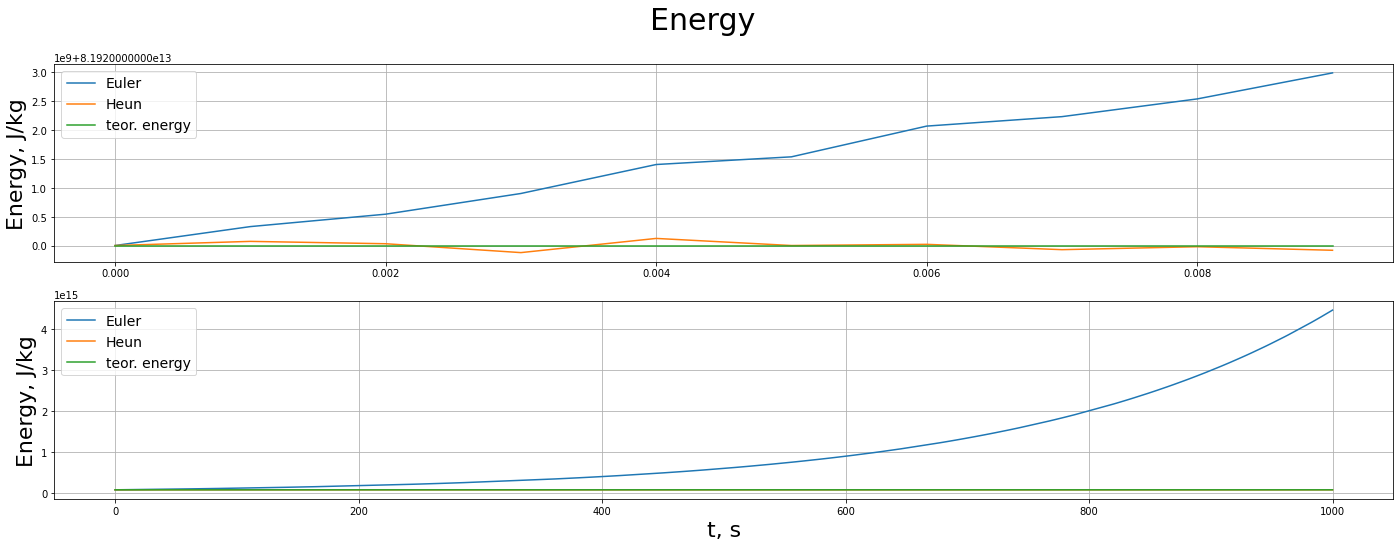

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Energy', fontsize=30)
fig.set_size_inches(24, 8)

t = np.linspace(0, d.N[0]*d.dx[0], len(d))
E_e = 0.5 * (d.v_e**2 + w**2*d.x_e**2)
E_h = 0.5 * (d.v_h**2 + w**2*d.x_h**2)

ax1.plot(t[:int(1e-5*len(t))], E_e[:int(1e-5*len(t))], '-', label='Euler')
ax1.plot(t[:int(1e-5*len(t))], E_h[:int(1e-5*len(t))], '-', label='Heun')
ax1.plot(t[:int(1e-5*len(t))], t[:int(1e-5*len(t))]-t[:int(1e-5*len(t))]+E_e[0], label='teor. energy')
ax1.set_ylabel('Energy, J/kg', fontsize=22)

ax2.plot(t, E_e, '-', label='Euler')
ax2.plot(t, E_h, '-', label='Heun')
ax2.plot(t, t-t+E_e[0], label='teor. energy')
ax2.set_ylabel('Energy, J/kg', fontsize=22)
ax2.set_xlabel('t, s', fontsize=22)

ax1.legend(fontsize=14, loc='best')
ax2.legend(fontsize=14, loc='best')
ax1.grid(True)
ax2.grid(True)
plt.show()

Как видно из графика, метод Эйлера не сохраняет энергию, она растет с экспоненциальной скоростью. Хойн же в среднем сохраняет энергию, отклонение от теории мало.

# Фазовая диаграмма

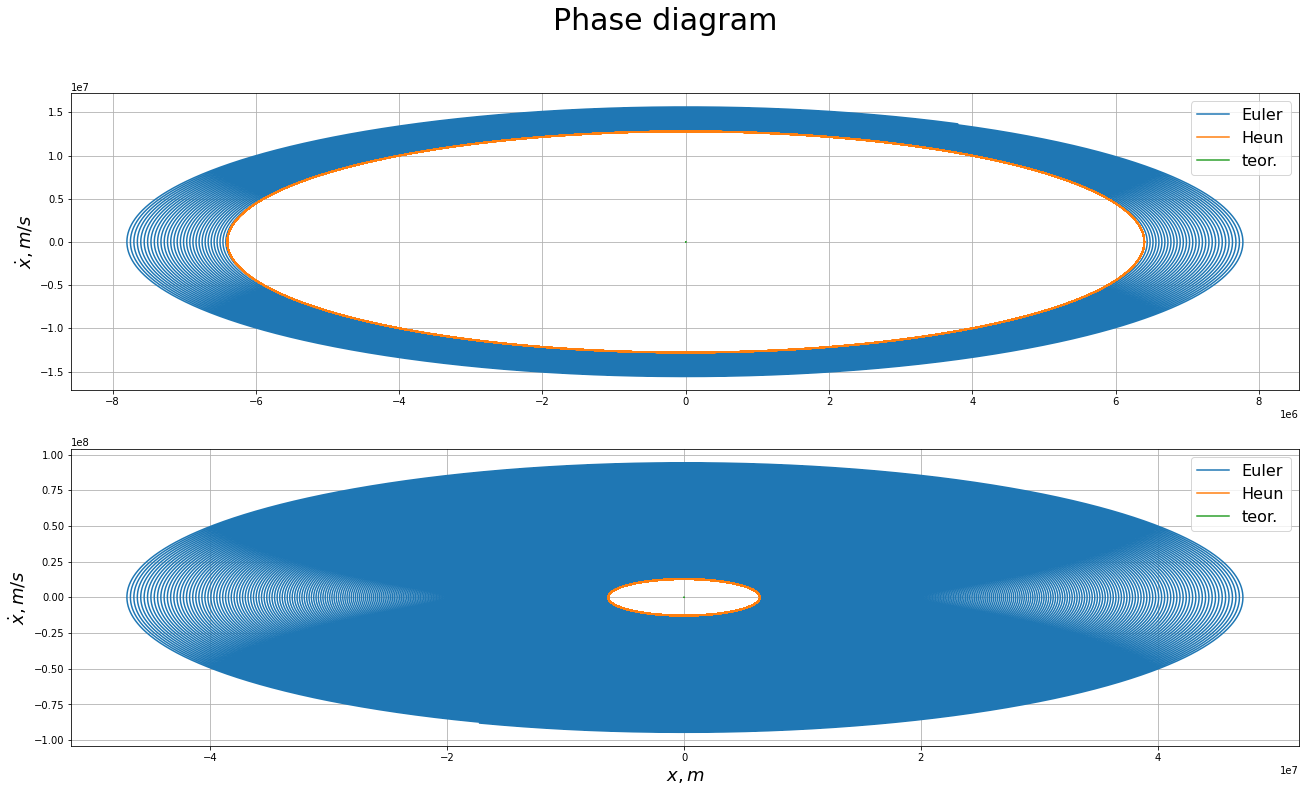

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Phase diagram', fontsize=30)
fig.set_size_inches(22, 12)

t = np.linspace(0, len(d), len(d))
A = np.sqrt(d.x_e[0]**2 + (d.v_e[0]/w)**2)
delta = -np.pi/2
if (d.x_e[0] != 0): delta = -np.arctan(d.v_e[0]/(d.x_e[0]*w))

ax1.plot(d.x_e[:int(len(d)*1e-1)], d.v_e[:int(len(d)*1e-1)], '-', label='Euler')
ax1.plot(d.x_h[:int(len(d)*1e-1)], d.v_h[:int(len(d)*1e-1)], '-', label='Heun')
ax1.plot(np.cos(w*t[:int(len(d)*1e-1)]+delta), np.sin(w*t[:int(len(d)*1e-1)]), '-', label='teor.')
ax1.set_ylabel('$\dot{x}, m/s$', fontsize=18)

ax2.plot(d.x_e, d.v_e, '-', label='Euler')
ax2.plot(d.x_h, d.v_h, '-', label='Heun')
ax2.plot(np.cos(w*t+delta), np.sin(w*t), '-', label='teor.')
ax2.set_ylabel('$\dot{x}, m/s$', fontsize=18)
ax2.set_xlabel('$x, m$', fontsize=18)

ax1.legend(fontsize=16, loc='best')
ax2.legend(fontsize=16, loc='best')
ax1.grid(True)
ax2.grid(True)
plt.show()

Фазовая диаграмма Эйлера "расходится", это не периодичное движение. Хойн "сливается" с теоретической кривой.

# Применимость методов

## Эйлер

На графиках видно, что чем меньше шаг $dx$, тем точнее вычисления. Но при любом шаге в какой-то момент начинается отклонение, амплитуда увеличивается с экспоненциальной скоростью. Причем на первом графике возрастание еще быстрее. Я объясняю это тем, что из-за очень большого шага (0,1) с точностью все еще "хуже".  
На графиках:  
1. Синий график - то, что посчитала машина
2. Пунктирная синусоида - теоретическое предсказание
3. Пунктирные огибающие - фит экспонентой
4. Оси: OX - время в единицах времени, OY - координата x в единицах длины

In [170]:
df = []
df.append(pd.read_csv(r'data1\fluct_6400000_0_15_0.1.txt'))
df.append(pd.read_csv(r'data1\fluct_6400000_0_20_0.07.txt'))
df.append(pd.read_csv(r'data1\fluct_6400000_0_30_0.05.txt'))
df.append(pd.read_csv(r'data1\fluct_6400000_0_50_0.03.txt'))
df.append(pd.read_csv(r'data1\fluct_6400000_0_100_0.01.txt'))
df.append(pd.read_csv(r'data1\fluct_6400000_0_100_0.005.txt'))
df.append(pd.read_csv(r'data1\fluct_6400000_0_500_0.001.txt'))

df_cut = []
a = []
func = []
eps = 0.01
for i in range(len(df)):
    t = np.linspace(0, df[i].L[0], int(df[i].L[0]/df[i].dx[0])+1)
    for j in range(len(t)):
        if np.absolute(np.cos(df[i].w[0]*t[j])-1) < eps :
            a.append([t[j], df[i].x_e[j] / (6400000*np.cos(df[i].w[0]*t[j]))])
    df_cut.append(np.array(a, dtype='float'))
    p = np.polyfit(df_cut[i][:,0], np.log(df_cut[i][:,1]), deg=1)
    func.append(np.poly1d(p))
    a = []


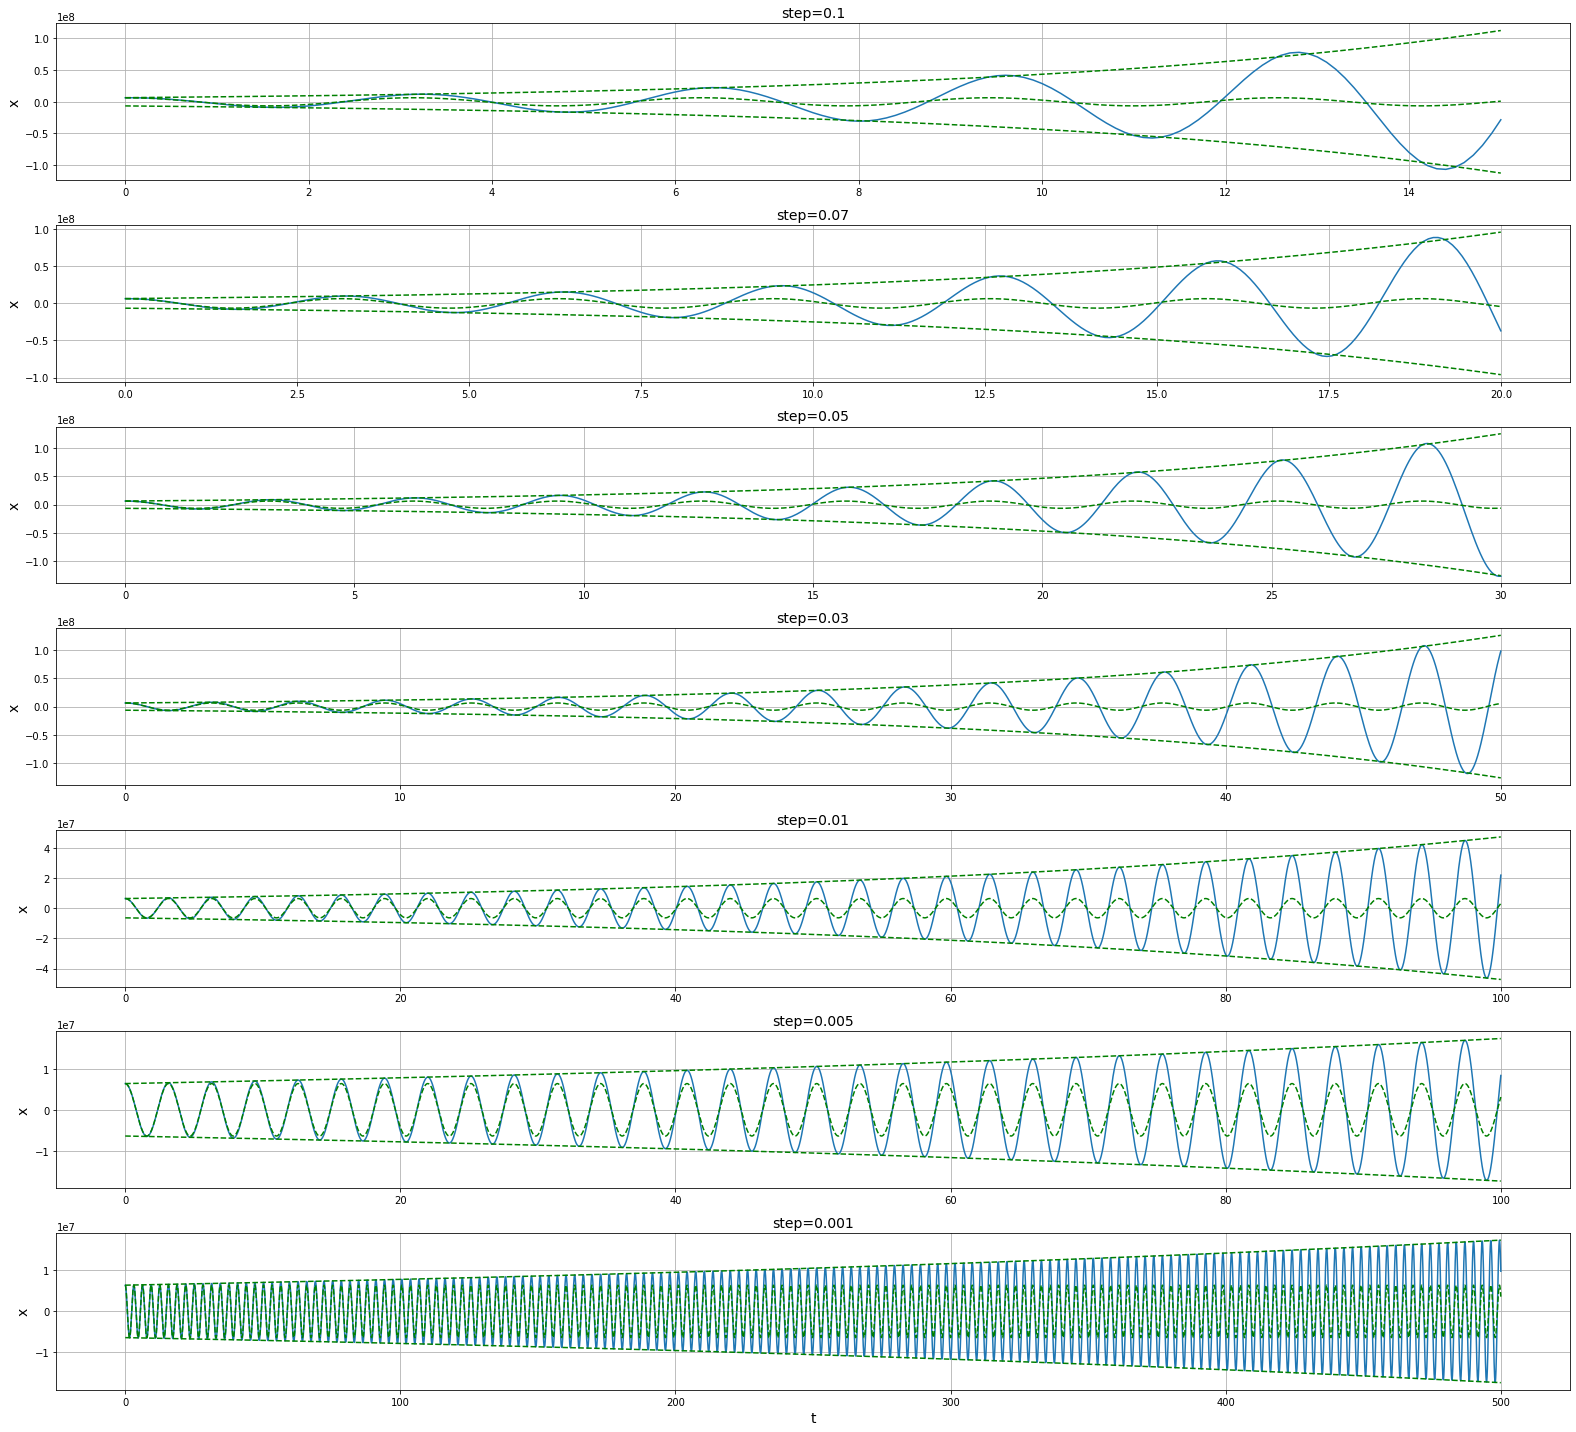

In [171]:
fig, ax = plt.subplots(len(df), 1)
fig.set_size_inches(22, 20)
#fig.suptitle('Euler\'s method with different step', fontsize=18)

for i in range(len(df)):
    t = np.linspace(0, df[i].L[0], int(df[i].L[0]/df[i].dx[0])+1)
    ax[i].plot(t, df[i].x_e[:len(t)], '-', label='step='+str(df[i].dx[0]))
    ax[i].plot(t, 6400000*np.cos(t*df[i].w[0]), '--', c='green')
    #ax[i].plot(t, t-t+6400000, c='red')
    #ax[i].plot(t, t-t-6400000, c='red')
    ax[i].set_title('step='+str(df[i].dx[0]), fontsize=14)
    ax[i].set_ylabel('x', fontsize=14)
    ax[i].plot(t, 6400000*np.exp(func[i](t)), '--', c='green')
    ax[i].plot(t, -6400000*np.exp(func[i](t)), '--', c='green')
    #ax[i].legend(fontsize=12, loc='upper left')
    ax[i].grid(True)
ax[len(df)-1].set_xlabel('t', fontsize=14)

fig.tight_layout()
plt.show()

Здесь я фитил. Я брал точки, которые лежат в $\varepsilon$ окрестности от максимумов $\cos(\omega t)=1$. Взяв $\varepsilon=0.01$, этих точек оказалось достаточно для довольно точного приближения.  
Фит делался numpy-евским методом, график построен в логарифмической шкале по OY для нагладности.

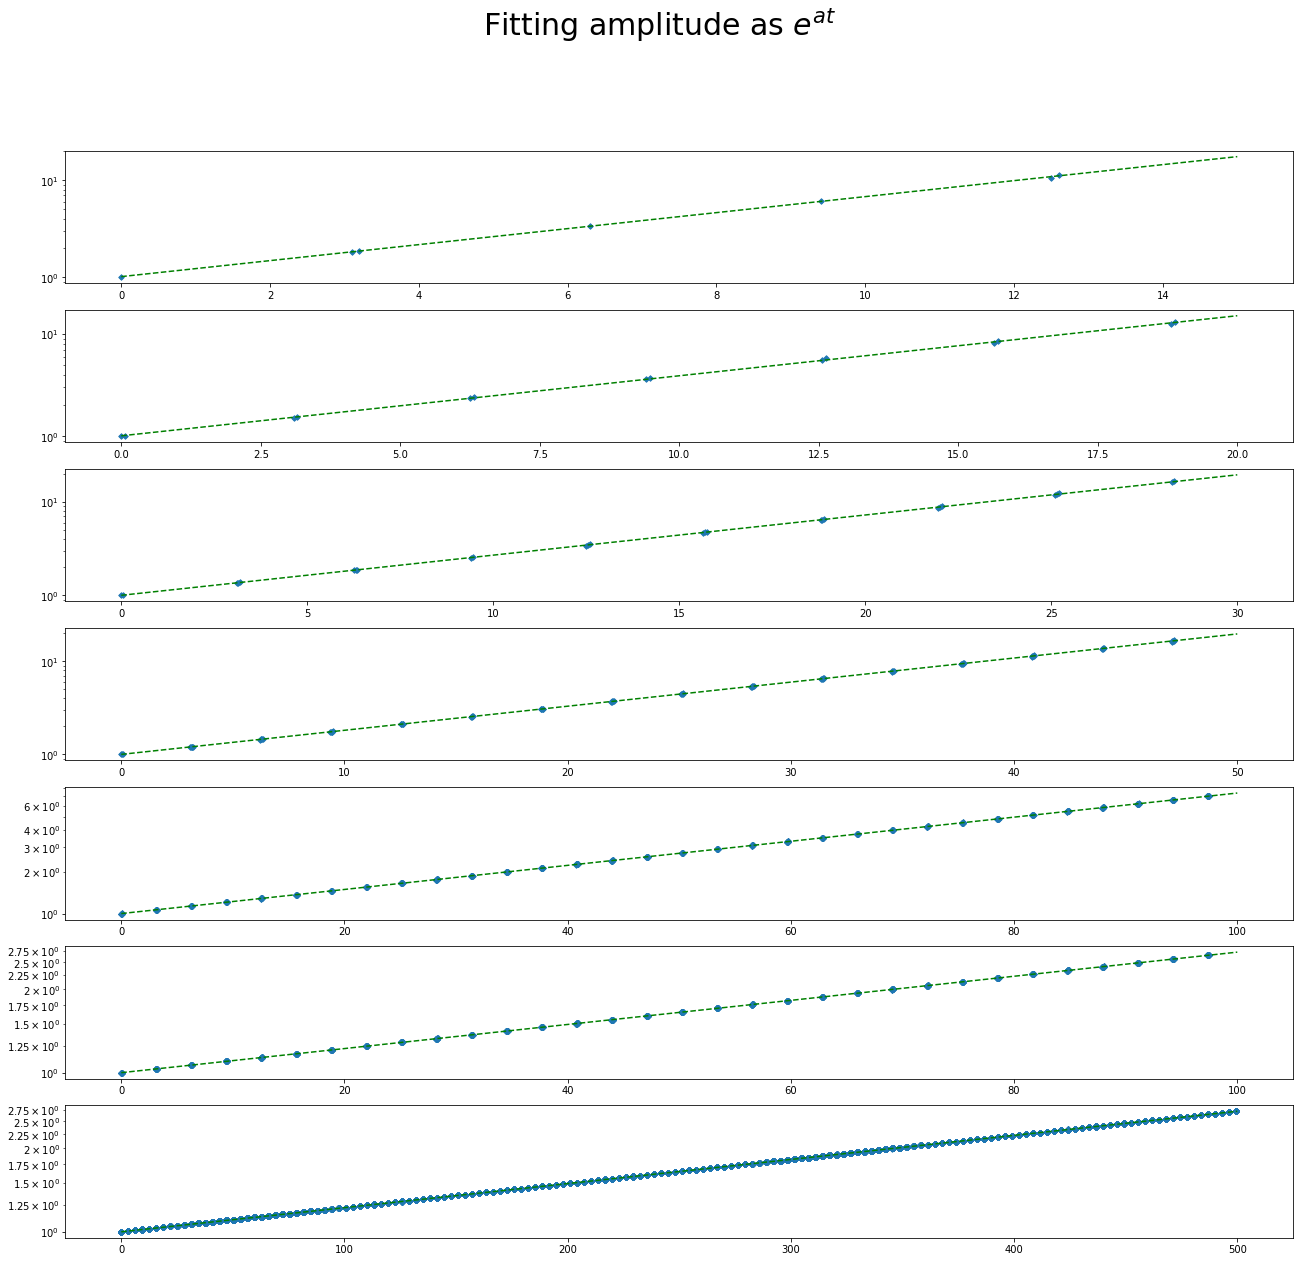

In [172]:
fig, ax = plt.subplots(len(df), 1)
fig.set_size_inches(22, 20)
fig.suptitle('Fitting amplitude as $e^{at}$', fontsize=30)

for i in range(len(df)):
    t = np.linspace(0, df[i].L[0], int(df[i].L[0]/df[i].dx[0])+1)
    ax[i].scatter(df_cut[i][:,0], df_cut[i][:,1], s=15, marker='D')
    ax[i].plot(t, np.exp(func[i](t)), '--', c='green')
    ax[i].set_yscale("log")

plt.show()

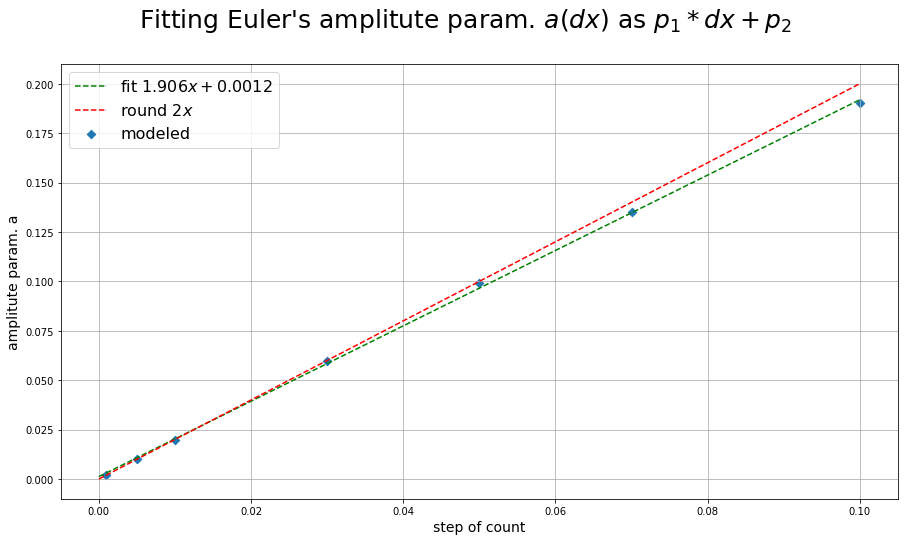

fit param. [1.90639151e+00 1.23372683e-03]


In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
fig.suptitle('Fitting Euler\'s amplitute param. $a(dx)$ as $p_1*dx+p_2$', fontsize=25)

k = np.zeros((len(func), 2), dtype='float')
for i in range(len(func)):
    k[i] = np.array([df[i].dx[0], func[i](1)-func[i](0)])

ax.scatter(k[:,0], k[:,1], marker='D', label='modeled')
p = np.polyfit(k[:,0], k[:,1], deg=1)
f = np.poly1d(p)
t = np.linspace(0, max(k[:,0]), 5)
ax.plot(t, f(t), '--', c='green', label='fit $1.906x+0.0012$')
ax.plot(t, 2*t, '--', c='red', label='round $2x$')

ax.legend(fontsize=16, loc='best')
ax.set_ylabel('amplitute param. a', fontsize=14)
ax.set_xlabel('step of count', fontsize=14)
plt.grid(True)
plt.show()
print('fit param.', p)

Здесь я фитил параметр амплитуды $a$, который, как нам известно из предыдущих пунктов, зависит от $dx$.  
Зависимость получилась линейная. Но это верно только для $dx \leq 0.1$, так как при больших $dx$ ошибка становится настолько большой, что начинает расти со скоростью большей, чем экспоненциальная. Этот эффект, но не в большом количестве, можно увидеть и при $dx = 0.1$.  
Фит был линейным: $a = p_1 dx + p_2$, где $p_1 = 1.906, \; p_2 = 1.23*10^{-3}$. Можно округлить до $a = 2 dx$ без потери точности.
Зависимость амплитуды от шага $dx$ в данном промежутке хорошо приближается $$A = A_0e^{2 dxt}.$$
Зная эту формулу можно оценить границы применимости данного метода.  
Чтобы иметь точность $p$ на промежутке $t$, должно выполняться неравенство 
$$e^{2dxt} \leq 1+p,$$ 
$$dx \leq \dfrac{\ln(1+p)}{2t} \approx \dfrac{p}{2t} \;(p \ll 1).$$

## Хойн

На первый взгляд Хойн расходится сильно медленнее Эйлера, что в послежствии и будет показано.  
На графиках:  
1. Синий график - то, что посчитала машина
2. Пунктирная синусоида - теоретическое предсказание
3. Пунктирные огибающие - фит экспонентой
4. Оси: OX - время в единицах времени, OY - координата x в единицах длины

In [187]:
df = []
df.append(pd.read_csv(r'data2\fluct_6400000_0_15_0.7.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_20_0.6.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_20_0.5.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_50_0.4.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_50_0.3.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_500_0.2.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_750_0.1.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_2500_0.05.txt'))
df.append(pd.read_csv(r'data2\fluct_6400000_0_25000_0.01.txt'))

d_max = []
a = [[0, 6.4e6]]

for i in range(len(df)):
    t = np.linspace(0, df[i].L[0], int(df[i].L[0]/df[i].dx[0])+1)
    for j in range(1, len(df[i]) - 1, 1):
        if (df[i].x_h[j] >= a[len(a)-1][1] and df[i].x_h[j] >= df[i].x_h[j-1] and df[i].x_h[j] >= df[i].x_h[j+1]):
            a.append(np.array([t[j], df[i].x_h[j]]))
    d_max.append(np.array(a, dtype='double'))
    a = [[0, 6.4e6]]
    print(i+1, 'of', len(df), 'done')

func=[]
for i in range(len(d_max)):
    func.append(np.poly1d(np.polyfit(d_max[i][:,0], np.log(d_max[i][:,1]/d_max[i][0][1]), deg=1)))

print('end')

1 of 9 done
2 of 9 done
3 of 9 done
4 of 9 done
5 of 9 done
6 of 9 done
7 of 9 done
8 of 9 done
9 of 9 done
end


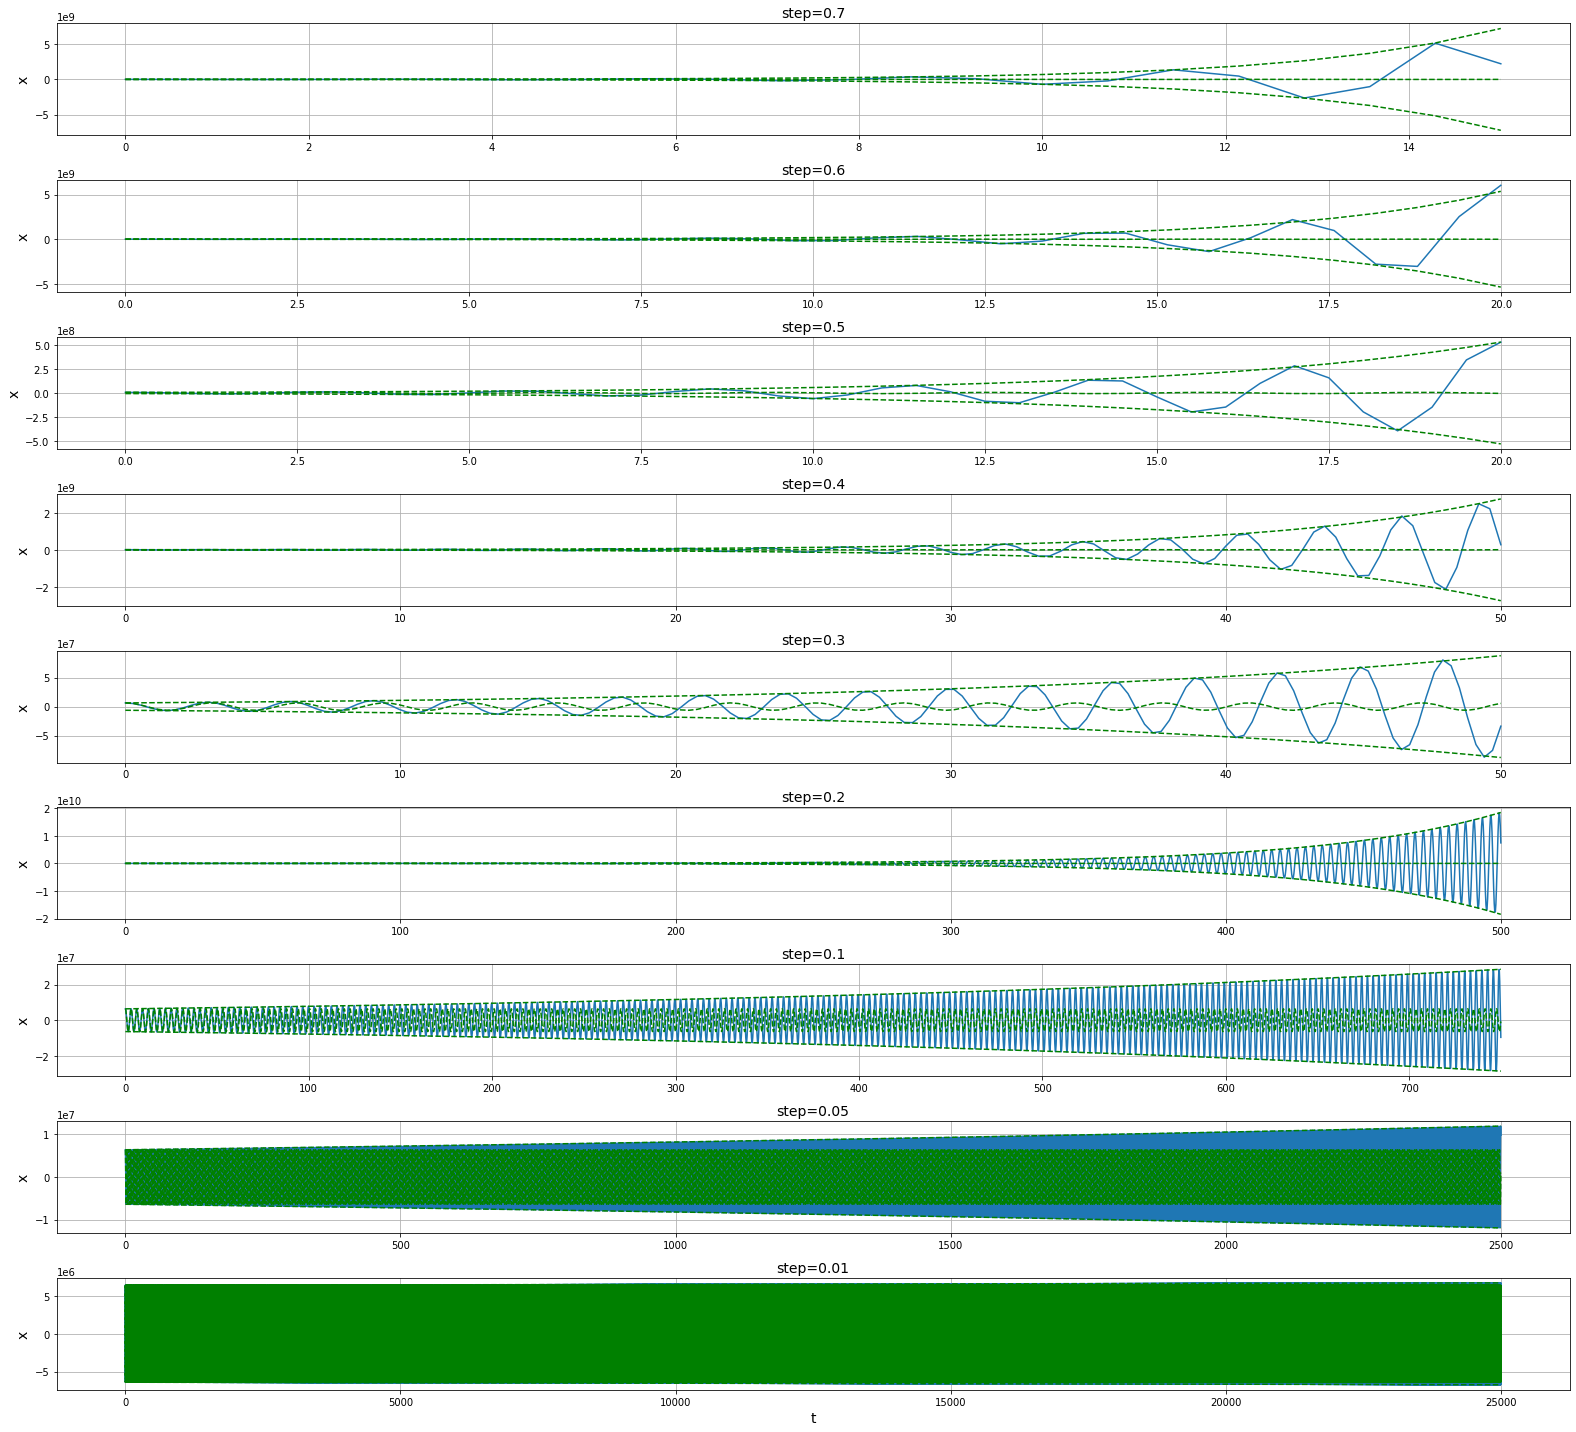

In [188]:
fig, ax = plt.subplots(len(df), 1)
fig.set_size_inches(22, 20)
#fig.suptitle('Euler\'s method with different step', fontsize=18)

for i in range(len(df)):
    t = np.linspace(0, df[i].L[0], int(df[i].L[0]/df[i].dx[0])+1)
    ax[i].plot(t, df[i].x_h[:len(t)], '-', label='step='+str(df[i].dx[0]))
    ax[i].plot(t, 6400000*np.cos(t*df[i].w[0]), '--', c='green')
    ax[i].plot(t, 6400000*np.exp(func[i](t)), '--', c='green')
    ax[i].plot(t, -6400000*np.exp(func[i](t)), '--', c='green')
    ax[i].set_title('step='+str(df[i].dx[0]), fontsize=14)
    ax[i].set_ylabel('x', fontsize=14)
    #ax[i].legend(fontsize=12, loc='upper left')
    ax[i].grid(True)
ax[len(df)-1].set_xlabel('t', fontsize=14)

fig.tight_layout()
plt.show()

Здесь происходили фиты огибающих. Так как точки посчитанных экстремумов сильно расходятся с теоретическими, тут нельзя взять окрестность экстремумов теории. Я сделал перебор максимумов и изобразил их на графике (OY в логарифмической шкале) и зафитил линией.

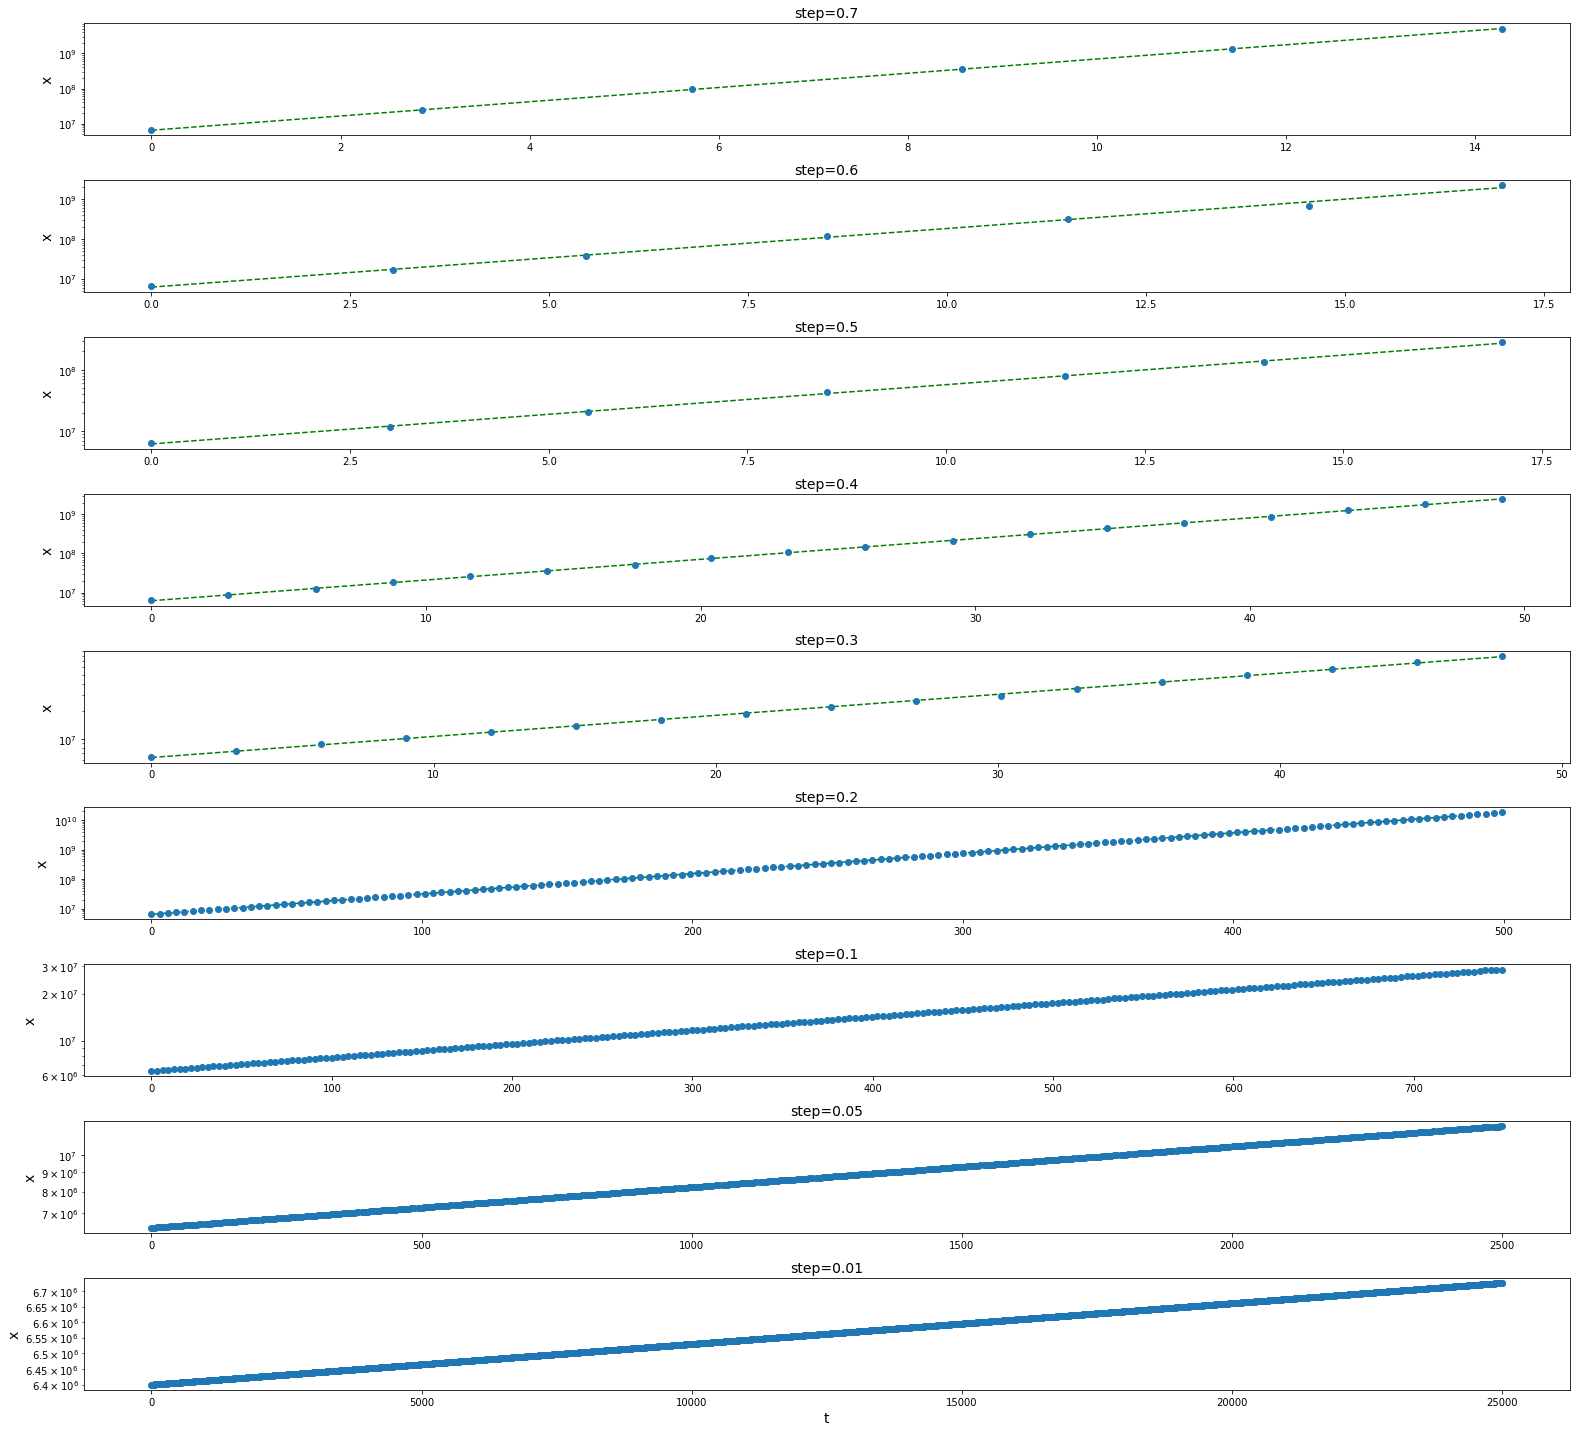

In [189]:
fig, ax = plt.subplots(len(df), 1)
fig.set_size_inches(22, 20)

for i in range(len(d_max)):
    t = np.linspace(0, d_max[i][len(d_max[i])-1,0], 5)
    ax[i].scatter(d_max[i][:,0], d_max[i][:,1], zorder=2)
    ax[i].plot(t, 6400000*np.exp(func[i](t)), '--', color='green', zorder=1)
    ax[i].set_title('step='+str(df[i].dx[0]), fontsize=14)
    ax[i].set_ylabel('x', fontsize=14)
    ax[i].set_yscale('log')
ax[len(df)-1].set_xlabel('t', fontsize=14)

fig.tight_layout()
plt.show()

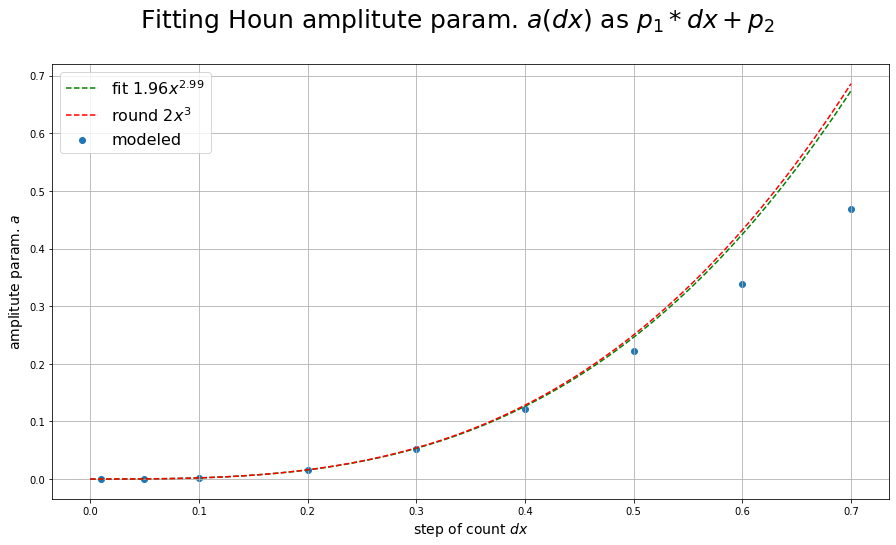

In [190]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
fig.suptitle('Fitting Houn amplitute param. $a(dx)$ as $p_1*dx+p_2$', fontsize=25)

k = np.zeros((len(func), 2), dtype='float')
for i in range(len(func)):
    k[i] = np.array([df[i].dx[0], func[i](1)-func[i](0)])

ax.scatter(k[:,0], k[:,1], label='modeled')
p = np.polyfit(np.log(k[4:,0]), np.log(k[4:,1]), deg=1)
f = lambda x: np.exp(p[1])*x**p[0]
t = np.linspace(0, max(k[:,0]), 1000)
ax.plot(t, f(t), '--', c='green', label='fit $1.96 x^{2.99}$')
ax.plot(t, 2*t**3, '--', c='red', label='round $2x^3$') 

ax.legend(fontsize=16, loc='best')
ax.set_ylabel('amplitute param. $a$', fontsize=14)
ax.set_xlabel('step of count $dx$', fontsize=14)
plt.grid(True)
plt.show()

Провел фит $a(dx)$. Фит учитывал только $dx \leq 0.3$, т.к. при больших $dx$ имеет место систематическое занижение параметра, обусловленное неидеальным алгоритмом нахождения максимума. Чем больше $dx$, тем дальше от "настоящего" максимума оказывается точка, для которой выполнено условие $x_i \geq x_{i \pm 1}$.  
Зависимость оказалась степенной ($a = p_1 * (dx)^{p_2}, \;p_1 = 1.96, \;p_2 = 2.99$). После округления: $a = 2(dx)^3$.  
Получается, что амплитуда меняется по закону $$A = A_0 e^{2(dx)^3t}.$$
Так, чтобы точность была $p$ на промежутке $t$, должно выполняться неравенство
$$1+p \geq e^{2(dx)^3t},$$
$$dx \leq \sqrt[3]{\dfrac{\ln(1+p)}{2t}} \approx \sqrt[3]{\dfrac{p}{2t}} \; (p \ll 1).$$

## Вывод
Было получено ограничение на $dx$ при условиях  длины промежутка $t$ и точности $p$ ($p \ll 1$ - конструктивный случай)
$$\boxed{dx_{\text{max}}^{\text{Euler}} = \dfrac{p}{2t}, \;\;dx_{\text{max}}^{\text{Houn}} = \sqrt[3]{\dfrac{p}{2t}}.}$$
Из этих формул видно, что метод Хойна при той же точности требует меньший шаг $dx$, причем чем больше рассматриваемый промежуток $t$, тем больше относительный выигрыш.